<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0/blob/master/11_SuperConvergence/SuperConvergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet18 ModelDiagnostics

## Install the PySodium Library

In [1]:
!pip install --upgrade git+https://github.com/satyajitghana/PySodium.git#egg=py-sodium

  Cloning https://github.com/satyajitghana/PySodium.git to /tmp/pip-install-ydcfajcn/py-sodium
  Running command git clone -q https://github.com/satyajitghana/PySodium.git /tmp/pip-install-ydcfajcn/py-sodium
  Created wheel for py-sodium: filename=py_sodium-0.0.2-cp36-none-any.whl size=22105 sha256=362a5ac805c998908916bf8de5e6e69036b2e161c3b99b3b27f2020e3bfe44bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-ir7cyh6e/wheels/ed/b2/24/860b8aa92c98c5b8e1e724d604e3c4bf4039ab8bb7f66bcc82
Successfully built py-sodium
  Found existing installation: py-sodium 0.0.2
    Uninstalling py-sodium-0.0.2:
      Successfully uninstalled py-sodium-0.0.2


## Create a config file

In [2]:
%%writefile cifar.yml
name: CIFAR10_CustomNet
save_dir: saved/
seed: 1
target_device: 0

arch:
    type: CIFAR10S11Model
    args: {}

augmentation:
    type: CIFAR10Albumentations
    args: {}

data_loader:
    type: CIFAR10DataLoader
    args:
        batch_size: 512
        data_dir: data/
        nworkers: 4
        shuffle: True

lr_finder:
    epochs: 50

criterion: cross_entropy_loss

lr_scheduler:
    max_lr_at_epoch: 5
    type: OneCycleLR
    args:
        max_lr: 0.1 # this value doesn't matter

optimizer:
    type: SGD
    args:
        lr: 0.001
        momentum: 0.95
        weight_decay: 0.0005

training:
    epochs: 24

Overwriting cifar.yml


## Import sodium

In [3]:
from sodium.utils import load_config
import sodium.runner as runner

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Create a runner with the config and train the model

In [4]:
!nvidia-smi

Sat Apr 11 17:49:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
config = load_config('cifar.yml')
runner = runner.Runner(config)
runner.setup_train(tsai_mode=True)

[ 2020-04-11 17:49:32,929 - sodium.sodium.runner ] INFO: Training Config
[ 2020-04-11 17:49:32,931 - sodium.sodium.runner ] INFO: {'arch': {'args': {}, 'type': 'CIFAR10S11Model'},
[ 2020-04-11 17:49:32,931 - sodium.sodium.runner ] INFO:  'augmentation': {'args': {}, 'type': 'CIFAR10Albumentations'},
[ 2020-04-11 17:49:32,932 - sodium.sodium.runner ] INFO:  'criterion': 'cross_entropy_loss',
[ 2020-04-11 17:49:32,933 - sodium.sodium.runner ] INFO:  'data_loader': {'args': {'batch_size': 512,
[ 2020-04-11 17:49:32,933 - sodium.sodium.runner ] INFO:                           'data_dir': 'data/',
[ 2020-04-11 17:49:32,934 - sodium.sodium.runner ] INFO:                           'nworkers': 4,
[ 2020-04-11 17:49:32,934 - sodium.sodium.runner ] INFO:                           'shuffle': True},
[ 2020-04-11 17:49:32,935 - sodium.sodium.runner ] INFO:                  'type': 'CIFAR10DataLoader'},
[ 2020-04-11 17:49:32,935 - sodium.sodium.runner ] INFO:  'lr_finder': {'epochs': 50},
[ 2020-04-

# Model Summary

In [6]:
runner.print_summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
            Conv2d-7          [-1, 128, 16, 16]         147,456
       BatchNorm2d-8          [-1, 128, 16, 16]             256
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
         ResBlock-11          [-1, 128, 16, 16]               0
       LayerBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         294,912
        MaxPool2d-14            [-1, 25

# Model Visualization

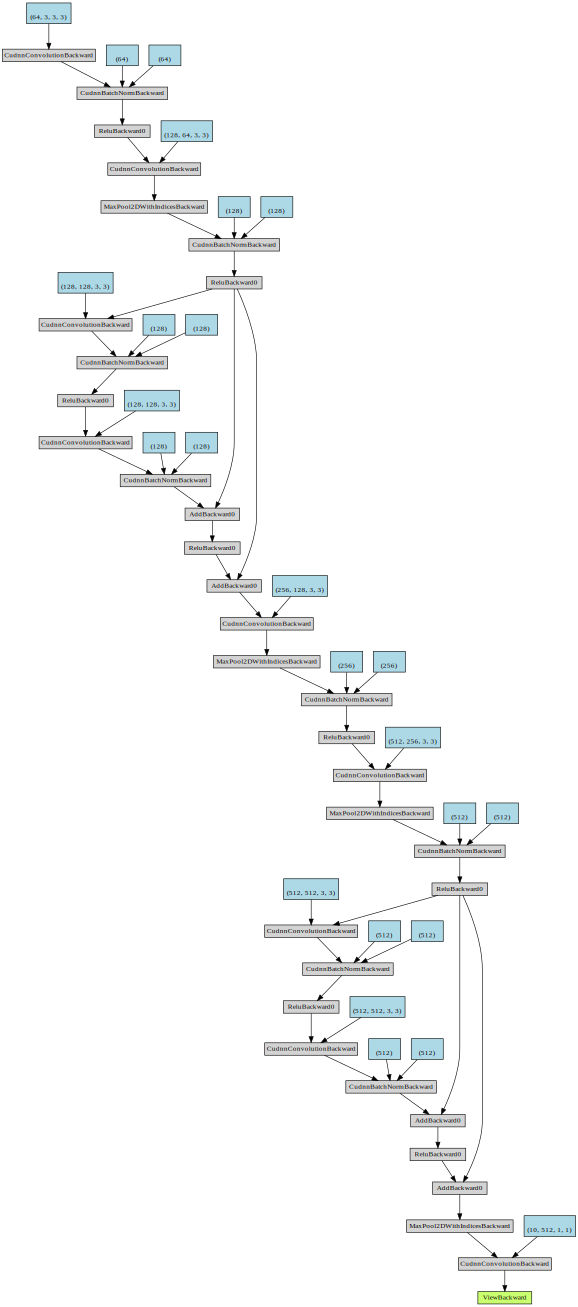

In [7]:
runner.print_visualization(input_size=(3, 32, 32))

# Find the Optimal LR

  pip install torch-lr-finder -v --global-option="amp"


[ 2020-04-11 17:49:37,921 - sodium.sodium.runner ] INFO: finding the best learning rate
[ 2020-04-11 17:49:37,922 - sodium.sodium.utils.config ] INFO: Building: sodium.tsai_model.CIFAR10S11Model
[ 2020-04-11 17:49:37,977 - sodium.sodium.utils.config ] INFO: Using device 0 of available devices [0]
[ 2020-04-11 17:49:37,987 - sodium.sodium.utils.config ] INFO: Building: torch.optim.SGD
[ 2020-04-11 17:49:37,992 - sodium.sodium.runner ] INFO: Running LR-Test for 50 epochs



Learning rate search finished. See the graph with {finder_name}.plot()
[ 2020-04-11 17:52:58,135 - sodium.sodium.runner ] INFO: sorted lrs : [0.609391, 0.61039, 0.6083919999999999, 0.611389, 0.607393, 0.606394, 0.63037, 0.613387, 0.626374, 0.612388]
[ 2020-04-11 17:52:58,137 - sodium.sodium.runner ] INFO: found the best lr : 0.609391
[ 2020-04-11 17:52:58,141 - sodium.sodium.runner ] INFO: plotting lr_finder


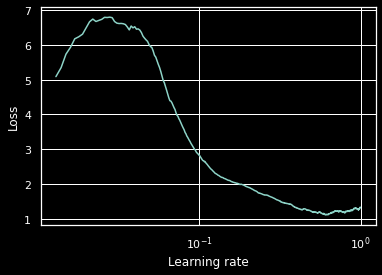

In [8]:
runner.find_lr()

In [9]:
runner.train(use_bestlr=True)

[ 2020-04-11 17:53:02,878 - sodium.sodium.runner ] INFO: using max_lr : 0.609391
[ 2020-04-11 17:53:02,880 - sodium.sodium.runner ] INFO: using min_lr : 0.02437564
[ 2020-04-11 17:53:02,880 - sodium.sodium.runner ] INFO: using initial_lr : 0.02437564
[ 2020-04-11 17:53:02,881 - sodium.sodium.base.base_trainer ] INFO: Starting training ...
[ 2020-04-11 17:53:02,882 - sodium.sodium.base.base_trainer ] INFO: Training the model for 24 epochs
[ 2020-04-11 17:53:02,883 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 1
[ 2020-04-11 17:53:02,883 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.0609391



[ 2020-04-11 17:53:23,077 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 1
[ 2020-04-11 17:53:25,116 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 9.18434291, Accuracy: 14.95 (1495/10000)
[ 2020-04-11 17:53:25,117 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 2
[ 2020-04-11 17:53:25,118 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.062038508696354744



[ 2020-04-11 17:53:45,164 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 2
[ 2020-04-11 17:53:47,172 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.87574627, Accuracy: 29.71 (2971/10000)
[ 2020-04-11 17:53:47,174 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 3
[ 2020-04-11 17:53:47,174 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.21389755266595



[ 2020-04-11 17:54:07,126 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 3
[ 2020-04-11 17:54:09,097 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.59167237, Accuracy: 40.31 (4031/10000)
[ 2020-04-11 17:54:09,098 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 4
[ 2020-04-11 17:54:09,101 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.4013425533038877



[ 2020-04-11 17:54:29,021 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 4
[ 2020-04-11 17:54:30,964 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.42252888, Accuracy: 48.11 (4811/10000)
[ 2020-04-11 17:54:30,966 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 5
[ 2020-04-11 17:54:30,969 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.5524925061048934



[ 2020-04-11 17:54:50,682 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 5
[ 2020-04-11 17:54:52,586 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.17813366, Accuracy: 58.65 (5865/10000)
[ 2020-04-11 17:54:52,587 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 6
[ 2020-04-11 17:54:52,588 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.6093905836605477



[ 2020-04-11 17:55:12,442 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 6
[ 2020-04-11 17:55:14,339 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.28134110, Accuracy: 56.46 (5646/10000)
[ 2020-04-11 17:55:14,340 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 7
[ 2020-04-11 17:55:14,341 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.6053199346480526



[ 2020-04-11 17:55:34,248 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 7
[ 2020-04-11 17:55:36,283 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.12193546, Accuracy: 62.50 (6250/10000)
[ 2020-04-11 17:55:36,284 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 8
[ 2020-04-11 17:55:36,289 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.593381486686096



[ 2020-04-11 17:55:56,173 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 8
[ 2020-04-11 17:55:58,086 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.33630468, Accuracy: 58.06 (5806/10000)
[ 2020-04-11 17:55:58,088 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 9
[ 2020-04-11 17:55:58,089 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.5739008895138693



[ 2020-04-11 17:56:17,798 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 9
[ 2020-04-11 17:56:19,749 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.25116492, Accuracy: 61.40 (6140/10000)
[ 2020-04-11 17:56:19,750 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 10
[ 2020-04-11 17:56:19,751 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.5474095230401038



[ 2020-04-11 17:56:39,325 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 10
[ 2020-04-11 17:56:41,204 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.10300098, Accuracy: 65.01 (6501/10000)
[ 2020-04-11 17:56:41,205 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 11
[ 2020-04-11 17:56:41,207 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.5146300026843654



[ 2020-04-11 17:57:00,526 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 11
[ 2020-04-11 17:57:02,478 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.14305131, Accuracy: 65.27 (6527/10000)
[ 2020-04-11 17:57:02,479 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 12
[ 2020-04-11 17:57:02,480 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.47645646831212674



[ 2020-04-11 17:57:22,127 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 12
[ 2020-04-11 17:57:24,035 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.74784445, Accuracy: 74.09 (7409/10000)
[ 2020-04-11 17:57:24,036 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 13
[ 2020-04-11 17:57:24,037 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.43393019443008507



[ 2020-04-11 17:57:43,840 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 13
[ 2020-04-11 17:57:45,740 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.66400628, Accuracy: 77.04 (7704/10000)
[ 2020-04-11 17:57:45,741 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 14
[ 2020-04-11 17:57:45,742 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.3882111869320202



[ 2020-04-11 17:58:05,268 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 14
[ 2020-04-11 17:58:07,218 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.70030228, Accuracy: 76.00 (7600/10000)
[ 2020-04-11 17:58:07,220 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 15
[ 2020-04-11 17:58:07,220 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.34054654116192185



[ 2020-04-11 17:58:26,595 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 15
[ 2020-04-11 17:58:28,463 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.64907807, Accuracy: 77.57 (7757/10000)
[ 2020-04-11 17:58:28,464 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 16
[ 2020-04-11 17:58:28,465 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.29223642440394



[ 2020-04-11 17:58:48,114 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 16
[ 2020-04-11 17:58:50,033 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.88274611, Accuracy: 73.11 (7311/10000)
[ 2020-04-11 17:58:50,034 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 17
[ 2020-04-11 17:58:50,034 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.244598610708157



[ 2020-04-11 17:59:09,424 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 17
[ 2020-04-11 17:59:11,375 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.55580001, Accuracy: 81.19 (8119/10000)
[ 2020-04-11 17:59:11,377 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 18
[ 2020-04-11 17:59:11,377 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.19893253544968165



[ 2020-04-11 17:59:30,952 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 18
[ 2020-04-11 17:59:32,935 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.66495195, Accuracy: 78.41 (7841/10000)
[ 2020-04-11 17:59:32,937 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 19
[ 2020-04-11 17:59:32,938 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.15648385011899157



[ 2020-04-11 17:59:52,296 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 19
[ 2020-04-11 17:59:54,186 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.43310098, Accuracy: 85.65 (8565/10000)
[ 2020-04-11 17:59:54,187 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 20
[ 2020-04-11 17:59:54,188 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.11841044419644418



[ 2020-04-11 18:00:13,337 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 20
[ 2020-04-11 18:00:15,227 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.42274830, Accuracy: 85.75 (8575/10000)
[ 2020-04-11 18:00:15,229 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 21
[ 2020-04-11 18:00:15,229 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.08575086094564431



[ 2020-04-11 18:00:34,491 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 21
[ 2020-04-11 18:00:36,419 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.39366266, Accuracy: 87.63 (8763/10000)
[ 2020-04-11 18:00:36,421 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 22
[ 2020-04-11 18:00:36,424 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.059395968660494666



[ 2020-04-11 18:00:55,533 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 22
[ 2020-04-11 18:00:57,384 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.34503094, Accuracy: 89.09 (8909/10000)
[ 2020-04-11 18:00:57,386 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 23
[ 2020-04-11 18:00:57,386 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.04006466010045723



[ 2020-04-11 18:01:16,805 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 23
[ 2020-04-11 18:01:18,737 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.30877029, Accuracy: 89.97 (8997/10000)
[ 2020-04-11 18:01:18,738 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 24
[ 2020-04-11 18:01:18,738 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.02828424297008953



[ 2020-04-11 18:01:38,335 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 24
[ 2020-04-11 18:01:40,302 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.30934148, Accuracy: 89.81 (8981/10000)
[ 2020-04-11 18:01:40,304 - sodium.sodium.runner ] INFO: Finished!


## Plot the metrics

[ 2020-04-11 18:01:47,372 - sodium.sodium.runner ] INFO: Plotting Metrics...


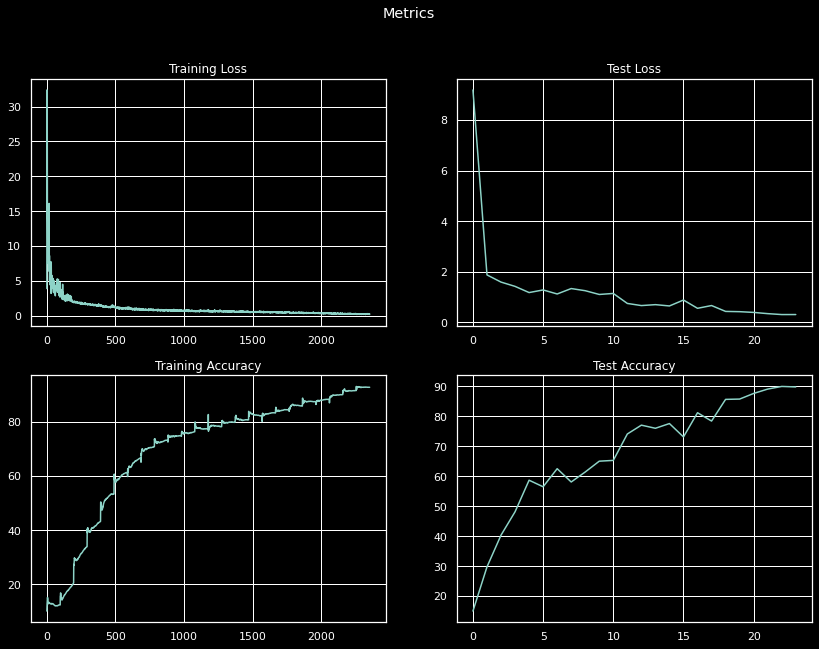

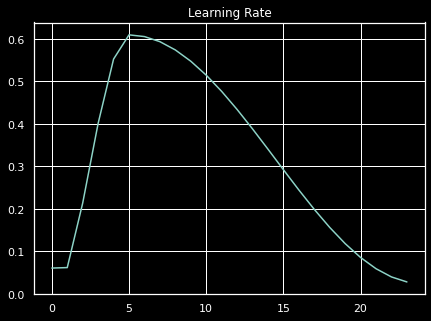

In [10]:
runner.plot_metrics()